In [118]:
import numpy as np
import pandas as pd
from pandas_datareader import data as wb
import matplotlib.pyplot as plt

In [119]:
PG = wb.DataReader('PG', data_source='yahoo', start='2002-1-1')

In [120]:
# PG.head()
# PG.tail()

## Simple Rate of Return

Simple RoR: 
$\frac{P_1-P_0}{P_0}=\frac{P_1}{P_0}-1$, where $P_0$ - previous price, $P_1$ - current price.

Preferable when you have to deal with multiple assets over the same period.

In [121]:
PG['simple_return'] = (PG['Adj Close'] / PG['Adj Close'].shift(1)) - 1
# PG['simple_return']

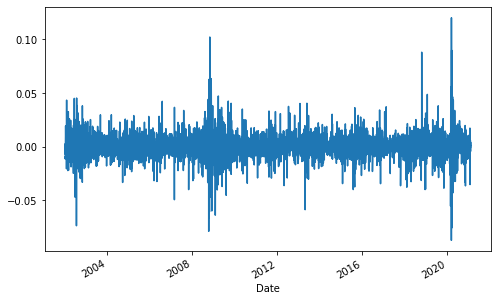

In [122]:
PG['simple_return'].plot(figsize=(8,5))
plt.show()

In [123]:
avg_returns_d = PG['simple_return'].mean()
print("Average daily RoR: {} %" \
      .format(round(avg_returns_d * 100, 5)))

Average daily RoR: 0.04185 %


In [124]:
# assuming there are 250-252 trading days per year
avg_returns_a = PG['simple_return'].mean() * 250
print("Average annual RoR: {} %" \
      .format(round(avg_returns_a * 100, 5)))

Average annual RoR: 10.46133 %


## Logarithmic Return

Log Return: $\ln(\frac{P_t}{P_{t-1}})$, where $P_t$ - price of stock at the end of the period, $P_{t-1}$ - price at the end of the previous period.

Preferable when you make calculations about a single asset over multiple timeframes.

In [125]:
PG['log_return'] = np.log(PG['Adj Close'] / PG['Adj Close'].shift(1))
# PG['log_return']

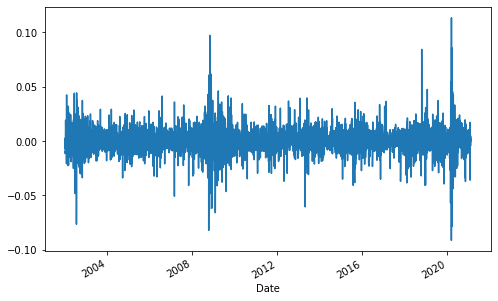

In [126]:
PG['log_return'].plot(figsize=(8,5))
plt.show()

In [127]:
log_return_d = PG['log_return'].mean()
print("Average daily Log Return: {} %" \
      .format(round(log_return_d * 100, 5)))

Average daily Log Return: 0.03523 %


In [128]:
# assuming there are 250-252 trading days per year
log_return_a = PG['log_return'].mean() * 250
print("Average annual Log Return: {} %" \
      .format(round(log_return_a * 100, 5)))

Average annual Log Return: 8.80632 %


## Return of a Portfolio of Securities

In [129]:
tickers = ['MSFT', 'PG', 'GE', 'F']
prices = pd.DataFrame()
for t in tickers:
  prices[t] = wb.DataReader(t, data_source='yahoo', start='2012-01-03')['Adj Close']

In [130]:
# prices.head()
prices.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2291 entries, 2012-01-03 to 2021-02-09
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   MSFT    2291 non-null   float64
 1   PG      2291 non-null   float64
 2   GE      2291 non-null   float64
 3   F       2291 non-null   float64
dtypes: float64(4)
memory usage: 89.5 KB


### Normalization. Compare stocks performance.

$\frac{P_t}{P_0}*100$, where $P_t$ - price at the end of the period, $P_0$ - intial stock price.

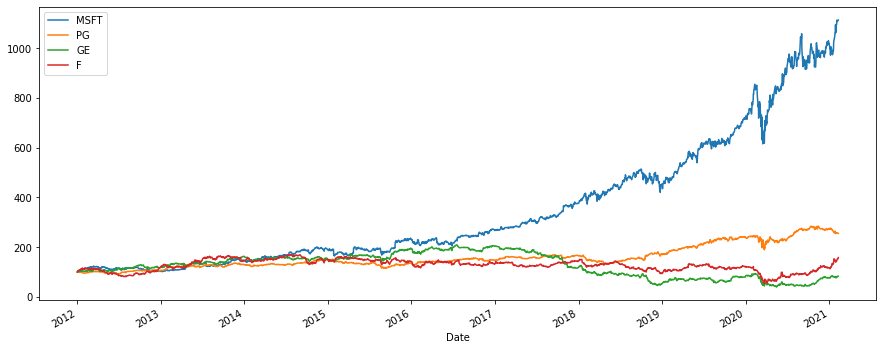

In [131]:
(prices / prices.iloc[0] * 100).plot(figsize=(15,6))
plt.show()

In [132]:
prices.loc['2012-01-03']

MSFT    21.849474
PG      50.355068
GE      13.911108
F        7.544740
Name: 2012-01-03 00:00:00, dtype: float64

### The return of a portfolio

In [133]:
# using simple RoR
#
returns = (prices / prices.shift(1)) - 1
returns.head()

,MSFT,PG,GE,F
Date,,,,
2012-01-03,NaN,NaN,NaN,NaN
2012-01-04,0.023534,-0.000449,0.010893,0.015274
2012-01-05,0.010219,-0.004192,-0.000539,0.025663
2012-01-06,0.015535,-0.002405,0.005391,0.010353
2012-01-09,-0.013163,0.004219,0.011260,0.007686


In [134]:
# average annual return
#
avg_returns_a = returns.mean() * 250
avg_returns_a

MSFT    0.296505
PG      0.118073
GE      0.031314
F       0.093379
dtype: float64

In [135]:
# portfolio weights
#
weights_1 = np.array([0.25, 0.25, 0.25, 0.25])
weights_2 = np.array([0.40, 0.40, 0.15, 0.05])

portfolio_1 = round(np.dot(avg_returns_a, weights_1) * 100, 5)
portfolio_2 = round(np.dot(avg_returns_a, weights_2) * 100, 5)

print("Return of portfolio 1: {} %". \
      format(portfolio_1))
print("Return of portfolio 2: {} %". \
      format(portfolio_2))

Return of portfolio 1: 13.48178 %
Return of portfolio 2: 17.51973 %


## Fin